# Draft analysis
## Yepeng Ding
### 12/18/2019

### Import libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from data_processor import get_log_return
from anharmonic_oscillator import AnharmonicOscillator

### Data processing

In [2]:
log_return = get_log_return()

### Construct anharmonic oscillator

In [3]:
omega = 60000
third = 0
fourth = 0
fifth = 0
ao = AnharmonicOscillator(interval_length=0.001, data_size=2256, boundary=0.4, omega=omega, h_bar=1, m=1, coefficient=[third, fourth, fifth])

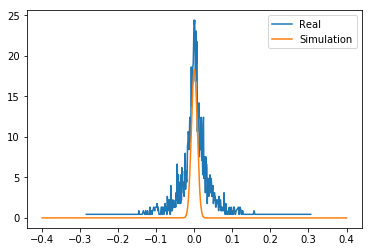

In [4]:
max_level = 100
w = [1.1**i for i in range(max_level, 0, -1)]

pdf = w[0] * ao.get_pdf_norm_graph(0)

for i in range(1, max_level):
    pdf += w[i] * ao.get_pdf_norm_graph(i)

pdf /= sum(w)

plt.plot(log_return.index, log_return, label='Real')
plt.plot(ao.position, pdf, label='Simulation')
# plt.plot(ao.position, np.diag(ao.potential), label='Potential')
plt.legend()
plt.show()